# Pymaceuticals Inc.
---

### Analysis

- Based on the analysis of the data concerning drug treatment on mice, it was observed that Capomulin may be a viable drug treatment to pursue. This data, which was conducted on 249 mice (51% male, 49% female), reveal that capomuclin had a smaller final tumor volume at the end of the drug regimens compared to infubinol and ceftamin. Ramicane had a similar result to capomulin. 
- Further analysis of capomulin on a single subject level reveals that after about 20 days of drug regimen there begins to be a decrease in tumor volume until about 35 days.
- Upon correlative analysis between tumor size and mouse wight, we see a positive correlation (.84); in other words, larger mice have larger tumor volumes. Data concerning drug dosage was not collected and it therefore cannot be concluded whether the dosage amount is relative to the weight of the subject. However, the findings do support some weakness of capomulin in larger subjects.
- Overall, it may be worthwhile to pursue further study of capomulin as a drug treatment. When applied to a relatively balanced population, positive results are produced. While ramicane had similar results, we do see a relatively quick effect from the capomulin. Further study into the relationship between weight and effectiveness should be conducted before making final conclusions.
 

In [1]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_df = pd.merge(study_results,mouse_metadata,how = 'left',on = 'Mouse ID')

# Display the data table for preview
mouse_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
num_mice = len(mouse_df['Mouse ID'].unique())
num_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = mouse_df[mouse_df.duplicated(['Mouse ID','Timepoint'],keep=False)]['Mouse ID'].unique()
dup_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_data = mouse_df[mouse_df.duplicated(['Mouse ID','Timepoint'],keep=False)]
dup_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# mouse_drop_df = mouse_df.drop(dup_data.index).reset_index(drop = True) ## method using dataframe with duplicated rows
mouse_drop_df = mouse_df.copy() # make copy to preserve original df
for i in dup_mice: # iterate in case there are multiple duplicate ids
    mouse_drop_df = mouse_drop_df.drop(mouse_drop_df[mouse_drop_df['Mouse ID'] == i].index).reset_index(drop=True) # rest index each time to remove correct duplicate rows
mouse_drop_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
num_mice = len(mouse_drop_df['Mouse ID'].unique())
num_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_group = mouse_drop_df[['Drug Regimen','Tumor Volume (mm3)']].groupby('Drug Regimen')
drug_mean = drug_group.mean().rename(columns = {'Tumor Volume (mm3)':'Mean Tumor Volume'})
drug_median = drug_group.median().rename(columns = {'Tumor Volume (mm3)':'Median Tumor Volume'})
drug_std = drug_group.std().rename(columns = {'Tumor Volume (mm3)':'Tumor Volume Std. Dev.'})
drug_var = drug_group.var().rename(columns = {'Tumor Volume (mm3)':'Tumor Volume Variance'})
drug_sem = drug_group.sem().rename(columns = {'Tumor Volume (mm3)':'Tumor Volume Std. Err.'})

# Assemble the resulting series into a single summary DataFrame.
drug_ss = pd.concat([drug_mean,drug_median,drug_var,drug_std,drug_sem],axis = 1)
drug_ss

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
drug_group = mouse_drop_df[['Drug Regimen','Tumor Volume (mm3)']].groupby('Drug Regimen').agg(['mean','median','var','std','sem'])
drug_group

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

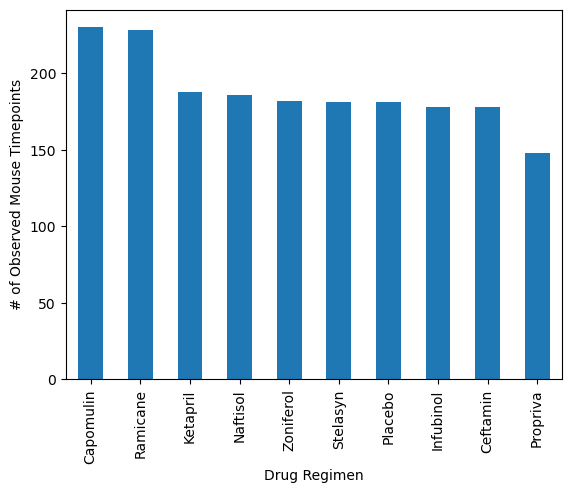

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_count = mouse_drop_df['Drug Regimen'].value_counts()
drug_count.plot(kind="bar")
plt.ylabel('# of Observed Mouse Timepoints')
plt.xlabel('Drug Regimen')
plt.show()

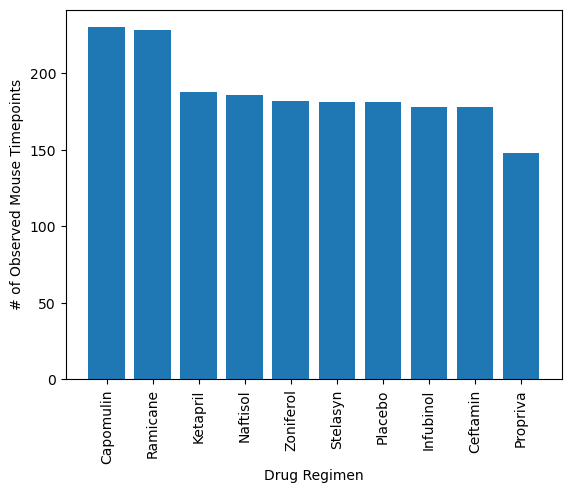

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_count = mouse_drop_df['Drug Regimen'].value_counts()
plt.bar(drug_count.index,drug_count.to_list())
plt.ylabel('# of Observed Mouse Timepoints')
plt.xlabel('Drug Regimen')
plt.xticks(rotation = 'vertical')
plt.show()

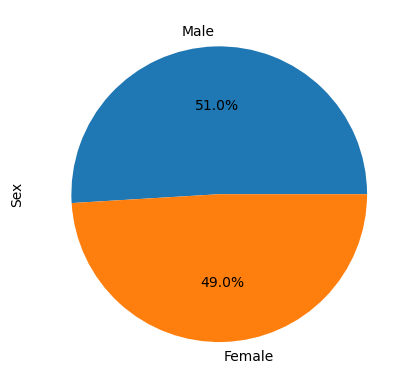

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_perc = mouse_drop_df['Sex'].value_counts()/mouse_drop_df['Sex'].value_counts().sum()
sex_perc.plot(kind='pie',autopct="%1.1f%%")
plt.show()

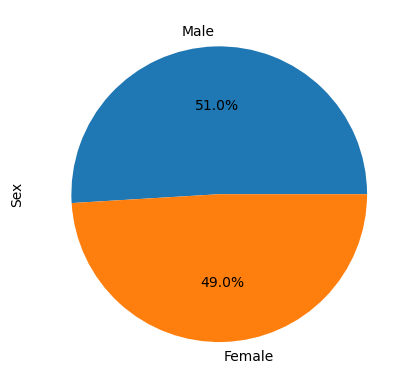

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_perc = mouse_drop_df['Sex'].value_counts()/mouse_drop_df['Sex'].value_counts().sum()
labels = sex_perc.index
percentage = sex_perc.to_list()
plt.pie(percentage, labels=labels,autopct="%1.1f%%")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_df = mouse_drop_df.groupby(by = ['Mouse ID','Drug Regimen']).max().reset_index()[['Mouse ID','Drug Regimen', 'Timepoint']]


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
temp = mouse_drop_df.copy()
final_df = final_df.merge(temp ,on=['Mouse ID','Drug Regimen','Timepoint'],how = 'left')
# final_df

In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)
drug_lst = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_df = final_df[final_df['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    q = tumor_df.quantile([.25,.5,.75])
    
    # add subset 
    drug_lst.append(tumor_df.to_list())
    
    # Determine outliers using upper and lower bounds
    iqr = q[.75]-q[.25]
    outliers = tumor_df[(tumor_df > q[.75] + (1.5*iqr)) | (tumor_df < q[.25] - (1.5*iqr))] 
    print(f'{drug}\'s potential outliers: {outliers}')




Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


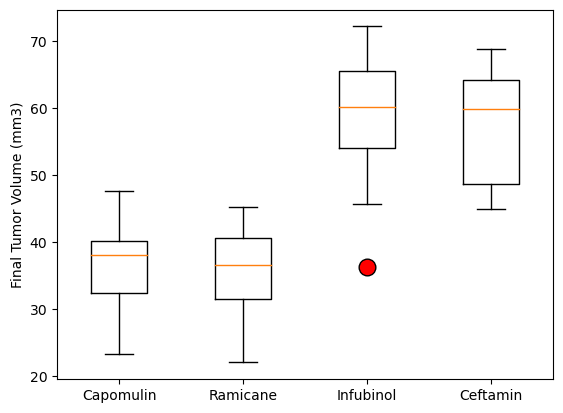

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(drug_lst,flierprops = dict(markerfacecolor='red', markersize=12, markeredgecolor='black'))
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1,2,3,4],['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()

## Line and Scatter Plots

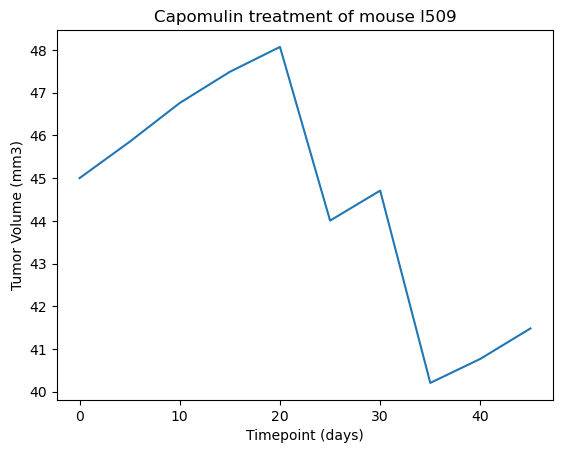

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
id = 'l509'
drug = 'Capomulin'
indiv_df = mouse_drop_df[(mouse_drop_df['Mouse ID'] == id) & (mouse_drop_df['Drug Regimen'] == drug)]
plt.plot(indiv_df['Timepoint'],indiv_df['Tumor Volume (mm3)'])
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint (days)')
plt.title(f'{drug} treatment of mouse {id}')
plt.show()

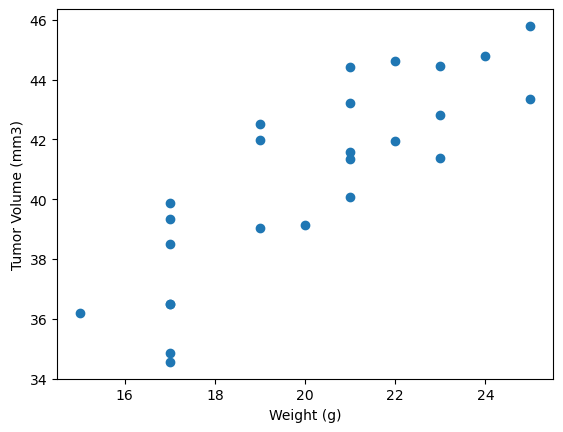

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
drug = 'Capomulin'
indiv_df = mouse_drop_df[(mouse_drop_df['Drug Regimen'] == drug)]
avg_df = indiv_df.groupby('Mouse ID').mean()
plt.scatter(avg_df['Weight (g)'],avg_df['Tumor Volume (mm3)'])
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


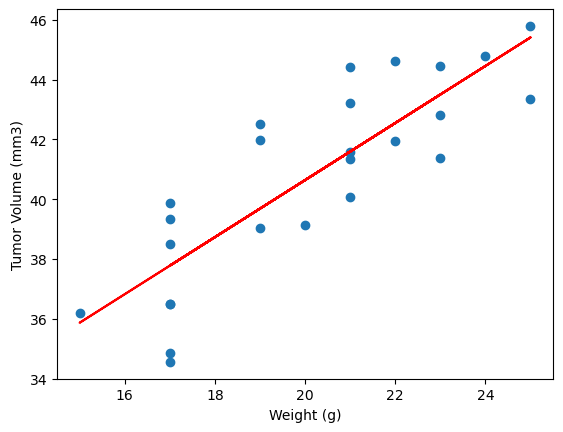

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
drug = 'Capomulin'
indiv_df = mouse_drop_df[(mouse_drop_df['Drug Regimen'] == drug)]
avg_df = indiv_df.groupby('Mouse ID').mean()
corr = avg_df['Tumor Volume (mm3)'].corr(avg_df['Weight (g)'])
print(f'The correlation between mouse weight and the average tumor volume is {corr:.2f}')

slope, intercept, rvalue, pvalue, stderr = st.linregress((avg_df['Weight (g)'],avg_df['Tumor Volume (mm3)']))
line = avg_df['Weight (g)'] * slope + intercept
plt.plot(avg_df['Weight (g)'],line,'red')
plt.scatter(avg_df['Weight (g)'],avg_df['Tumor Volume (mm3)'])
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.show()